In [1]:
cd Measurement-automation/

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
# from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [4]:
# reload(lib2.ResonatorDetector)
# reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

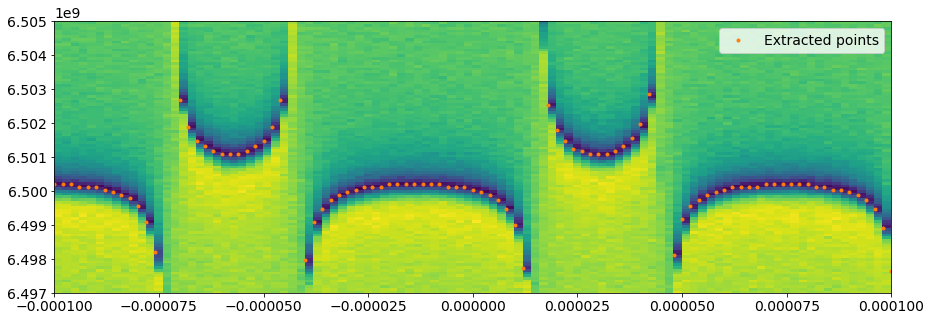

In [5]:
anti0 = MeasurementResult.load("BMSTU Clean 3", "I-anticrossing")
ao0 = AnticrossingOracle("transmon", anti0, plot=True, fast_res_detect=False, hints=[])

In [6]:
anti1 = MeasurementResult.load("BMSTU Clean 3", "VI-anticrossing")
data_dict = anti1.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

In [37]:
tts0 = MeasurementResult.load("BMSTU Clean 3", "I-two-tone")
tts1 = MeasurementResult.load("BMSTU Clean 3", "VI-two-tone")
tts2 = MeasurementResult.load("Xmon 2Q", "III-two-tone")


In [89]:
params

array([1.80505504e-04, 2.50000000e-05, 5.89452097e+09, 3.25003845e-01])

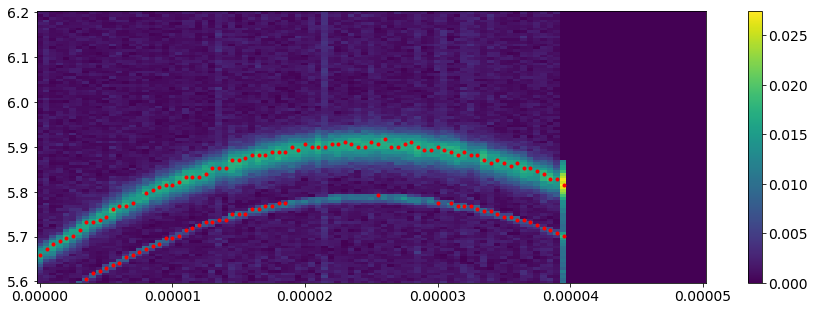

In [68]:
reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *
params = result2[0][2:]
params[1] = 2.5e-5
so = SpectrumOracle("transmon", tts2, params, True)

In [62]:
result0

(array([ 6.50071690e+09,  3.59193870e+07,  8.77623592e-05, -1.40674438e-05,
         8.97273272e+09,  8.83350315e-02]), 0.031017437716106256)

Done: 3.85%, 260/6732, [1.81e-04, 1.60e-05, 5.75e+00, 5.00e-01], mean_dist: 1.93e-02 , chosen points: 40.0
Done: 4.00%, 270/6732, [1.81e-04, 1.60e-05, 5.82e+00, 4.20e-01], mean_dist: 6.29e-02 , chosen points: 50.0
Done: 4.14%, 280/6732, [1.81e-04, 1.60e-05, 5.89e+00, 3.40e-01], mean_dist: 3.05e-02 , chosen points: 50.0
Done: 4.29%, 290/6732, [1.81e-04, 1.60e-05, 5.97e+00, 2.60e-01], mean_dist: 4.06e-02 , chosen points: 40.0
Done: 12.17%, 820/6732, [1.81e-04, 1.76e-05, 5.75e+00, 4.20e-01], mean_dist: 2.94e-02 , chosen points: 40.0
Done: 12.31%, 830/6732, [1.81e-04, 1.76e-05, 5.82e+00, 3.40e-01], mean_dist: 5.64e-02 , chosen points: 60.0
Done: 12.46%, 840/6732, [1.81e-04, 1.76e-05, 5.89e+00, 2.60e-01], mean_dist: 5.11e-02 , chosen points: 60.0
Done: 12.61%, 850/6732, [1.81e-04, 1.76e-05, 5.97e+00, 1.80e-01], mean_dist: 3.96e-02 , chosen points: 40.0
Done: 20.48%, 1380/6732, [1.81e-04, 1.93e-05, 5.75e+00, 3.40e-01], mean_dist: 3.10e-02 , chosen points: 40.0
Done: 20.63%, 1390/6732, [1.81e

Done: 100%, polishing..., [1.649e-04, 2.481e-05, 5.907e+00, 4.909e-01, 1.181e-01], dist:4.99e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.635e-04, 2.481e-05, 5.907e+00, 5.034e-01, 1.181e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.635e-04, 2.481e-05, 5.907e+00, 5.030e-01, 1.181e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.613e-04, 2.481e-05, 5.907e+00, 5.220e-01, 1.181e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.591e-04, 2.481e-05, 5.907e+00, 5.391e-01, 1.179e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.599e-04, 2.481e-05, 5.907e+00, 5.326e-01, 1.180e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.590e-04, 2.481e-05, 5.907e+00, 5.392e-01, 1.180e-01], dist:4.98e-03 , chosen points: 125 , bin: 25
Done: 100%, polishing..., [1.580e-04, 2.481e-05, 5.908e+00, 5.476e-01, 1.180e-01], dist:4.98e-03 , chose

array([1.51627270e-04, 2.48100010e-05, 5.90758311e+09, 5.93099807e-01,
       1.17929335e-01])

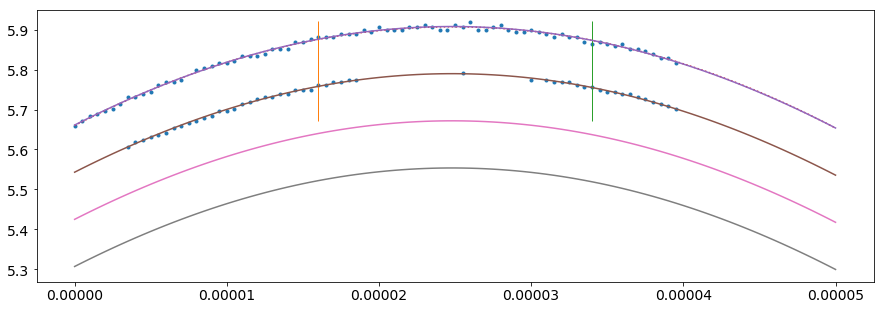

In [69]:
so.launch()

In [7]:
anti2 = MeasurementResult.load("Xmon 2Q", "III-anticrossing")
# data_dict = anti2.get_data()
# data_dict["data"] = data_dict["data"]+\
#         2e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
    
# data_dict["data"] = (savgol_filter(real(S21s), 21, 2)\
#                                 + 1j*savgol_filter(imag(S21s), 21, 2))
# data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)
# anti.set_data(data_dict)


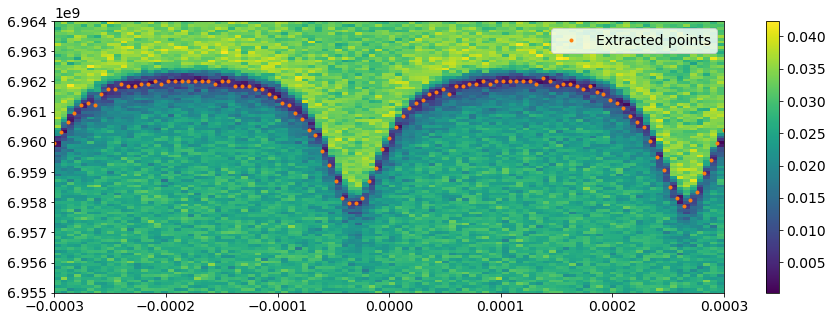

In [31]:
ao = AnticrossingOracle("transmon", anti1, plot=True, hints=["fqmax_above"])
# ao2 = AnticrossingOracle("transmon", anti2, plot=True, hints=[])
plt.colorbar()

In [86]:
anti2._datetime

datetime.datetime(2018, 9, 11, 20, 59, 51, 696883)

6.9610e+09, 1.5614e+07, 2.9400e-04, -3.2999e-05, 7.8762e+09, 1.1580e-01 loss: 1.50 MHz


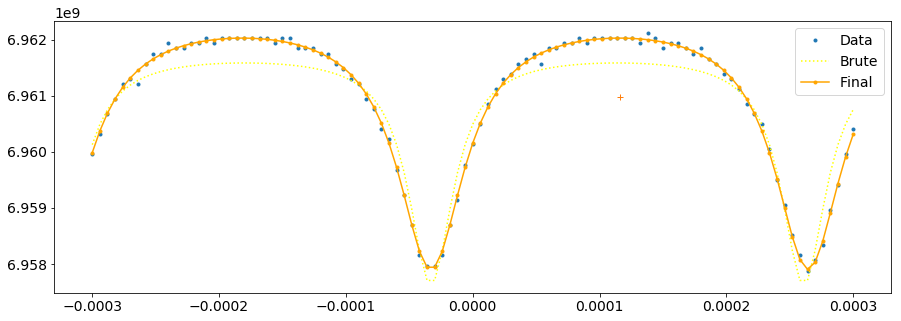

In [32]:
# result0 = ao0.launch()
result1 = ao.launch()
# result2 = ao2.launch()

In [22]:
ao._brute_opt_params, ao._brute_loss

([6961974752.475247,
  36000000.0,
  0.000294,
  0.00011399999999999998,
  10260974752.475246,
  0.5],
 0.3382049555624031)

In [24]:
result2

(array([ 6.46445996e+09,  8.65323836e+07,  1.80505504e-04, -1.44779965e-05,
         5.89452097e+09,  3.25003845e-01]), 0.15756084878993645)

In [10]:
rcParams['axes.formatter.offset_threshold'] = 2

'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


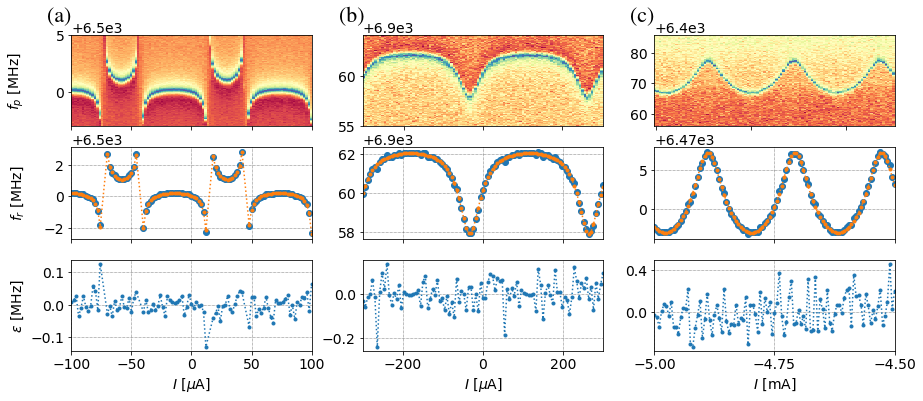

In [128]:
##### Data 0

plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)

# x = (anti0._data["Current [A]"]-result0[0][3])/result0[0][2]
x = anti0._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))


pcolormesh(x/1e-6, anti0._data["frequency"]/1e6, abs(anti0._data["data"]).T, cmap="Spectral_r", rasterized=True)

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.gca().set_xticklabels([])


plt.ylabel("$f_p$ [MHz]")


plt.text(-0.1, 1.15, "(a)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)

###### Fit 0

plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=1)

# x = (ao0._res_points[:,0]-result0[0][3])/result0[0][2]
x = ao0._res_points[:,0]


plot(x/1e-6, ao0._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x/1e-6, ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6, marker=".", linestyle=":")

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))

plt.gca().set_xticklabels([])

plt.ylabel("$f_r$ [MHz]")


plt.grid()

########## Error 0
plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1)


plot(x/1e-6, ao0._res_points[:,1]/1e6 - ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.xlabel("$I$ [$\mu$A]")

plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()

##### Data 1
plt.subplot2grid((3, 3), (0, 1), rowspan=1, colspan=1)

# x = (anti1._data["Current [A]"]-result1[0][3])/result1[0][2]

x = anti1._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))


pcolormesh(x, anti1._data["frequency"]/1e6, abs(anti1._data["data"]).T, cmap="Spectral_r", rasterized=True)

plt.gca().set_xticklabels([])

plt.text(-0.1, 1.15, "(b)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)

######### Fit 1
plt.subplot2grid((3, 3), (1, 1), rowspan=1, colspan=1)

# x = (ao._res_points[:,0]-result1[0][3])/result1[0][2]
x = ao._res_points[:,0]


plot(x, ao._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x, ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-300e-6, 300e-6)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().set_xticklabels([])

# plt.ylabel("$f_r$ [MHz]")
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(1))



ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)
plt.grid()

######## Error 1
plt.subplot2grid((3, 3), (2, 1), rowspan=1, colspan=1)


plot(x/1e-6, ao._res_points[:,1]/1e6 - ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-300,300)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.xlabel("$I$ [$\mu$A]")

# plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()


##### Data 2
plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)

# x = (anti2._data["Current [A]"]-result2[0][3])/result2[0][2]+26
x = anti2._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))

pcolormesh(x, anti2._data["frequency"]/1e6, abs(anti2._data["data"]).T, cmap="Spectral_r", rasterized=True)

plt.gca().set_xticklabels([])

plt.text(-0.1, 1.15, "(c)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)


######### Fit 2
plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)

# x = (ao2._res_points[:,0]-result2[0][3])/result2[0][2]+26
x = (ao2._res_points[:,0])


plot(x/1e-3, ao2._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x/1e-3, ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-5,-4.5)
plt.gca().set_xticklabels([])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(2))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))

# plt.ylabel("$f_r$ [MHz]")
# plt.ylim(6.5125, 6.514)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)


plt.grid()

######## Error 2
plt.subplot2grid((3, 3), (2, 2), rowspan=1, colspan=1)


plot(x/1e-3, ao2._res_points[:,1]/1e6 - ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-5,-4.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(2))
plt.xlabel("$I$ [mA]")

# plt.ylabel(r"$\varepsilon$ [MHz]")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(2))


plt.grid()
gcf().set_size_inches(13,5.8)
plt.tight_layout(h_pad=-0.1, w_pad=-0.2)
plt.gcf().align_ylabels()
plt.savefig("../Pictures/fit_cases.pdf", bbox_inches="tight")

In [117]:
ao._res_points[:,0]

array([-3.00e-04, -2.94e-04, -2.88e-04, -2.82e-04, -2.76e-04, -2.70e-04,
       -2.64e-04, -2.58e-04, -2.52e-04, -2.46e-04, -2.40e-04, -2.34e-04,
       -2.28e-04, -2.22e-04, -2.16e-04, -2.10e-04, -2.04e-04, -1.98e-04,
       -1.92e-04, -1.86e-04, -1.80e-04, -1.74e-04, -1.68e-04, -1.62e-04,
       -1.56e-04, -1.50e-04, -1.44e-04, -1.38e-04, -1.32e-04, -1.26e-04,
       -1.20e-04, -1.14e-04, -1.08e-04, -1.02e-04, -9.60e-05, -9.00e-05,
       -8.40e-05, -7.80e-05, -7.20e-05, -6.60e-05, -6.00e-05, -5.40e-05,
       -4.80e-05, -4.20e-05, -3.60e-05, -3.00e-05, -2.40e-05, -1.80e-05,
       -1.20e-05, -6.00e-06,  0.00e+00,  6.00e-06,  1.20e-05,  1.80e-05,
        2.40e-05,  3.00e-05,  3.60e-05,  4.20e-05,  4.80e-05,  5.40e-05,
        6.00e-05,  6.60e-05,  7.20e-05,  7.80e-05,  8.40e-05,  9.00e-05,
        9.60e-05,  1.02e-04,  1.08e-04,  1.14e-04,  1.20e-04,  1.26e-04,
        1.32e-04,  1.38e-04,  1.44e-04,  1.50e-04,  1.56e-04,  1.62e-04,
        1.68e-04,  1.74e-04,  1.80e-04,  1.86e-04, 

In [75]:
anti = MeasurementResult.load("Xmon-043-3", "VI-anticrossing_fit-fail")
data_dict = anti.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

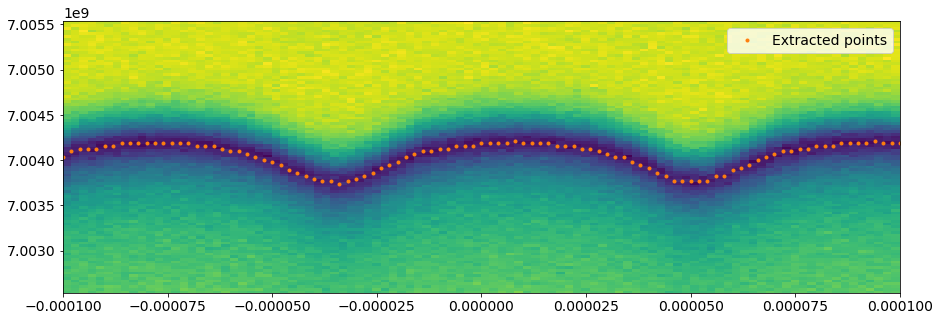

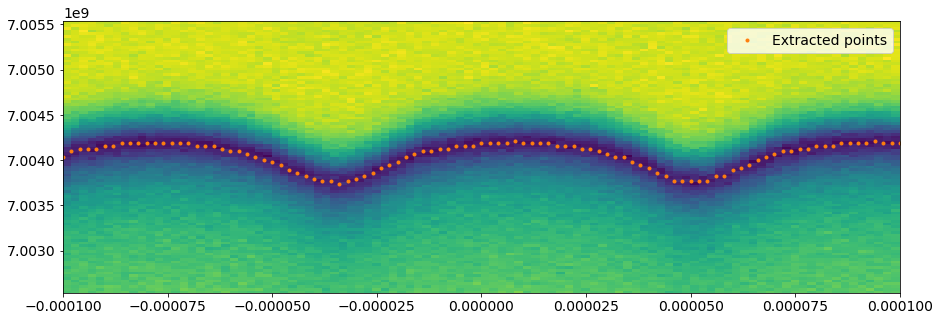

In [79]:
ao_above = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_above"])
ao_below = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_below"])

7.0045e+09, 2.7009e+07, 8.5620e-05, 7.6581e-06, 9.2804e+09, 7.3697e-01 loss: 0.01 MHz


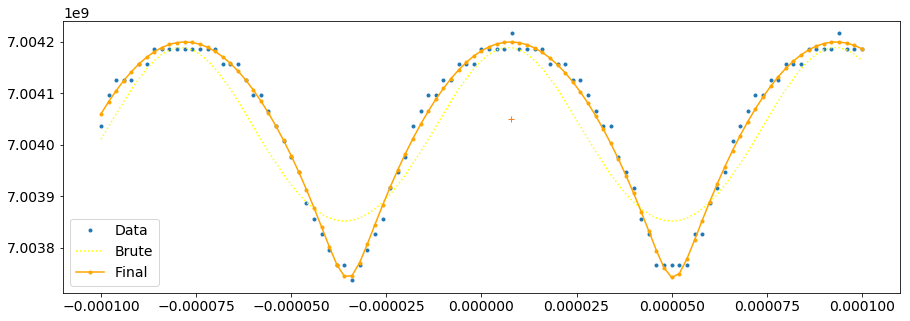

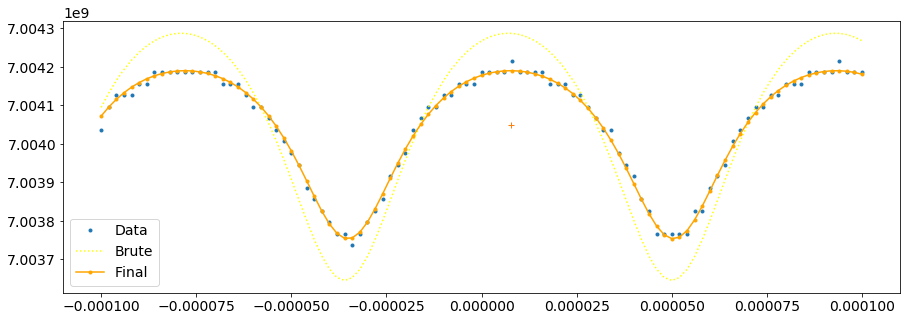

In [80]:
result_below = ao_below.launch()
result_above = ao_above.launch()

In [109]:
result_above, result_below

((array([7.00451107e+09, 2.70398486e+07, 8.56208038e-05, 7.65910481e-06,
         9.28266203e+09, 7.36910026e-01]), 0.010924879203737758),
 (array([ 7.00152052e+09,  1.18588054e+08,  8.55910486e-05,  7.66425672e-06,
          1.75473255e+09, -1.46086016e-01]), 0.013687107476708517))

/home/gleb/py36/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


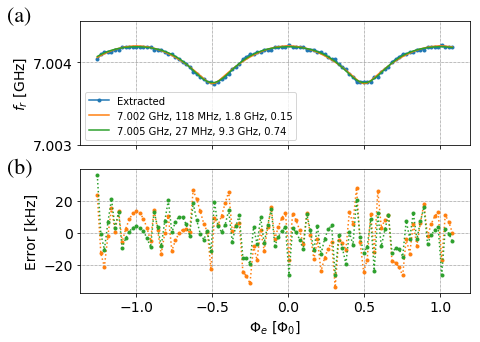

In [153]:
plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)

x = (ao_below._res_points[:,0]-result_above[0][3])/result_above[0][2]

plot(x, ao_below._res_points[:,1]/1e9, marker=".", linestyle="-", label="Extracted");
plot(x, ao_below._model_fast(ao_below._res_points[:,0],
     ao_below._opt_params)/1e9, linestyle="-", 
     label=r"7.002 GHz, 118 MHz, 1.8 GHz, 0.15")

plot(x, ao_below._model_fast(ao_above._res_points[:,0],
     ao_above._opt_params)/1e9, linestyle="-",
     label=r"7.005 GHz, 27 MHz, 9.3 GHz, 0.74")

plt.gca().set_xticklabels([])


plt.ylabel("$f_r$ [GHz]")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
plt.ylim(7.003, 7.0045)

plt.grid()
plt.legend(fontsize=10)

plt.text(-1.85, 7.0045, "(a)", fontdict={"name":"STIX"}, fontsize=22)


plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)


plot(x, ao_below._model_fast(ao_below._res_points[:,0],
                             ao_below._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C1", 
                             marker=".", linestyle=":", label="")
plot(x, ao_below._model_fast(ao_above._res_points[:,0],
                             ao_above._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C2", marker=".", linestyle=":")

# plt.xlim(-.75,.75)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# plt.gca().set_xticklabels([])

plt.ylabel("Error [kHz]")


plt.text(-1.85, 37, "(b)", fontdict={"name":"STIX"}, fontsize=22)

plt.xlabel("$\Phi_e$ [$\Phi_0$]")


plt.grid()
plt.gcf().set_size_inches(7,5)
plt.savefig("../Pictures/alternative_fits.pdf", bbox_inches="tight")